In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from Bandit import *

In [32]:
class Bandit:
    
    def __init__(self, k):
        self.k = k
        self.means = np.random.rand(k)
        self.N_greedy = np.zeros(k)
        self.N_UCB = np.zeros(k)

    def first_round(self):
        self.N_greedy += np.ones(self.k)
        self.N_UCB += np.ones(self.k)
        return np.array([self.gen_reward(i) for i in range(self.k)])

    def gen_reward(self, a):
        return np.random.normal(self.means[a], 5)
        # return np.random.binomial(2, self.means[a])

    def UCB_Q_up(self, Q, r, a):
        return Q[a] + (r - Q[a]) / self.N_UCB[a]
    
    def greedy_Q_up(self, Q, r, a):
        return Q[a] + (r - Q[a]) / self.N_greedy[a]

    def greedy_as(self, Q):
        a = np.argmax(Q)
        self.N_greedy[a] += 1
        return a

    def UCB_as(self, Q, t):
        a = np.argmax(Q + np.sqrt(2 * np.log(t)/self.N_UCB))
        self.N_UCB[a] += 1
        return a


In [33]:
# Run and problem patameters
T = 10000
runs = 200
k = 5

Q_greedy = np.zeros(k)
Q_UCB = np.zeros(k)

# Regret
L_greedy = np.ones(T)
L_UCB = np.ones(T)

# Optimal action percentage
P_greedy = np.zeros(T)
P_UCB = np.zeros(T)

opt_cnt_greedy = 0
opt_cnt_UCB = 0

In [34]:
for j in tqdm(range(runs)):
        bandit = Bandit(k)
        opt_index = np.argmax(bandit.means)
        opt_v = bandit.means[opt_index]
        Q_greedy = bandit.first_round()
        Q_UCB = Q_greedy
        for i in range(T):
            # Action selection
            a_greedy = bandit.greedy_as(Q_greedy)
            a_UCB = bandit.UCB_as(Q_UCB, i + 1)

            if a_greedy == opt_index:
                opt_cnt_greedy += 1
            if a_UCB == opt_index:
                opt_cnt_UCB += 1

            # Reward distribution
            r_greedy = bandit.gen_reward(a_greedy)
            r_UCB = bandit.gen_reward(a_UCB)

            Q_greedy[a_greedy] = bandit.greedy_Q_up(Q_greedy, r_greedy, a_greedy)
            Q_UCB[a_UCB] = bandit.UCB_Q_up(Q_UCB, r_UCB, a_UCB)

            L_greedy[i] += (opt_v - Q_greedy[a_greedy] - L_greedy[i])/(j + 1)
            L_UCB[i] += (opt_v - Q_UCB[a_UCB] - L_UCB[i]) / (j + 1)

            P_greedy[i] += (opt_cnt_greedy / (i + 1) - P_greedy[i]) / (j + 1)
            P_UCB[i] += (opt_cnt_UCB / (i + 1) - P_UCB[i]) / (j + 1)

        opt_cnt_greedy = 0
        opt_cnt_UCB = 0

  0%|          | 0/200 [00:00<?, ?it/s]

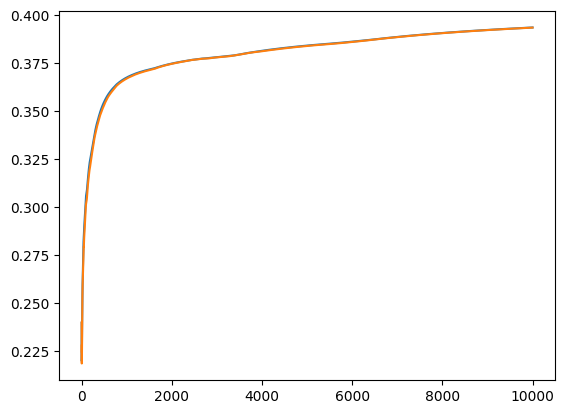

In [35]:
plt.plot(np.arange(T), P_greedy)
plt.plot(np.arange(T), P_UCB)
plt.show()

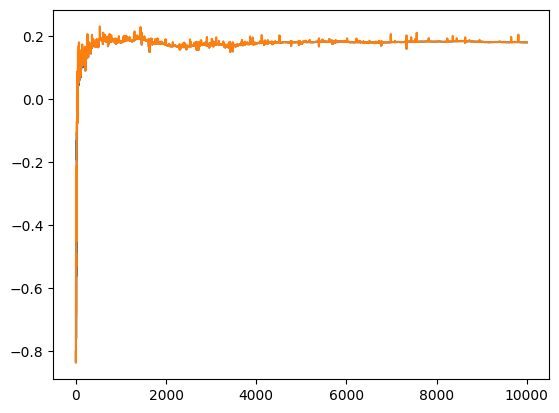

In [36]:
plt.plot(np.arange(T), L_greedy)
plt.plot(np.arange(T), L_UCB)
plt.show()